In [55]:
from PINNs import *
import torch
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS

In [56]:
dtype=torch.float64
setup_seed(3)
num_x = 400                                                        
num_t = 100                                                        
num_ic = 1000                                           
num_int = 20000                                            
Time = 0.5
L = 1
Tstart = 0
Tend = 0.5
Xstart = -1
Xend = 2

In [57]:
def train(epoch):
    def closure():
      optimizer.zero_grad()                                              
      
      loss_pde = model.loss_pde(x_int) 
      loss_ic = model.loss_ic(x_ic,u_ic)
      loss_bcL = model.loss_ic(x_bcL,u_bcL)
      loss_bcR = model.loss_ic(x_bcR,u_bcR)
      #loss_bd =  0.0*model.loss_bd(x_bdL_ignore,u_bdL_ignore)
      loss = loss_pde + 10*(loss_ic)#+loss_bcL+loss_bcR)##+10*loss_bd 

      print(f'epoch {epoch} loss_pde:{loss_pde:.8f}, loss_ic:{loss_ic:.8f}')
      loss.backward()
      return loss
    loss = optimizer.step(closure)
    return loss 

In [58]:
x_ic,x_bc,x_int = Mesh_Data(num_x,num_t,Tstart,Tend, Xstart,Xend)

x_bcL = np.zeros((num_t,2))
x_bcR = np.zeros((num_t,2))
x_bcL = x_bc[:num_t-1,:]
x_bcR = x_bc[num_t-1:,:]
u_bcL = BC_Constant(x_bcL)
u_bcR = BC_Constant(x_bcR)
xlimits = np.array([[0.,Time],[-L, 2*L]])  #interal
sampling = LHS(xlimits=xlimits)
x_int= sampling(num_int)

xlimits = np.array([[0.,0.0],[-L, 2*L]])  #interal
sampling = LHS(xlimits=xlimits)
x_ic= sampling(num_ic)


u_ic = IC_Sin_Case2(x_ic)
x_ic = torch.tensor(x_ic, dtype=dtype).to(cuda)
u_ic = torch.tensor(u_ic, dtype=dtype).to(cuda)
x_bcL = torch.tensor(x_bcL, dtype=dtype).to(cuda)
x_bcR = torch.tensor(x_bcR, dtype=dtype).to(cuda)
u_bcL = torch.tensor(u_bcL, dtype=dtype).to(cuda)
u_bcR = torch.tensor(u_bcR, dtype=dtype).to(cuda)
x_int= torch.tensor(x_int,requires_grad=True,dtype=dtype).to(cuda)

In [59]:
u_bcL

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0',
       dtype=torch.float64)

In [60]:
model = PINNs_scalar_1D(Nl=5,Nn=30).to(cuda).double()

epoch = 0
epochi = epoch
lr = 0.001                                                           # Learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 100000
loss_history=[]
tic = time.time()
for epoch in range(1+epochi, epochs+epochi):
    loss = train(epoch)
    print(f'loss_tot:{loss:.8f}')
    loss_history.append(to_numpy(loss))
    if loss < 0.05:
        break
toc = time.time()
print(f'Total training time: {toc - tic}')

epoch 1 loss_pde:0.00085844, loss_ic:0.75165158
loss_tot:7.51737429
epoch 2 loss_pde:0.00075618, loss_ic:0.70164950
loss_tot:7.01725115
epoch 3 loss_pde:0.00070685, loss_ic:0.65352292
loss_tot:6.53593600
epoch 4 loss_pde:0.00070493, loss_ic:0.60720869
loss_tot:6.07279187
epoch 5 loss_pde:0.00075382, loss_ic:0.56272850
loss_tot:5.62803884
epoch 6 loss_pde:0.00085528, loss_ic:0.52012110
loss_tot:5.20206624
epoch 7 loss_pde:0.00100994, loss_ic:0.47941685
loss_tot:4.79517847
epoch 8 loss_pde:0.00121842, loss_ic:0.44065133
loss_tot:4.40773170
epoch 9 loss_pde:0.00148174, loss_ic:0.40388278
loss_tot:4.04030949
epoch 10 loss_pde:0.00180127, loss_ic:0.36920484
loss_tot:3.69384962
epoch 11 loss_pde:0.00217820, loss_ic:0.33675074
loss_tot:3.36968558
epoch 12 loss_pde:0.00261267, loss_ic:0.30669018
loss_tot:3.06951447
epoch 13 loss_pde:0.00310296, loss_ic:0.27922181
loss_tot:2.79532105
epoch 14 loss_pde:0.00364504, loss_ic:0.25456238
loss_tot:2.54926884
epoch 15 loss_pde:0.00423256, loss_ic:0.232

In [61]:
optimizer = torch.optim.LBFGS(model.parameters(),lr=0.1,max_iter=20)
epochi = epoch

epochs = 2000
tic = time.time()
for epoch in range(epochi, epochs+epochi):
    loss = train(epoch)
    print(f'loss_tot:{loss:.8f}')
    loss_history.append(to_numpy(loss))
    #if loss < 0.01:
    #    break
toc = time.time()

print(f'Total training time: {toc - tic}')

epoch 640 loss_pde:0.00163554, loss_ic:0.00479445
epoch 640 loss_pde:0.00163661, loss_ic:0.00477779
epoch 640 loss_pde:0.00163709, loss_ic:0.00476503
epoch 640 loss_pde:0.00163787, loss_ic:0.00472754
epoch 640 loss_pde:0.00163943, loss_ic:0.00465469
epoch 640 loss_pde:0.00164520, loss_ic:0.00452518
epoch 640 loss_pde:0.00166625, loss_ic:0.00431175
epoch 640 loss_pde:0.00171091, loss_ic:0.00401144
epoch 640 loss_pde:0.00173662, loss_ic:0.00388915
epoch 640 loss_pde:0.00175312, loss_ic:0.00379754
epoch 640 loss_pde:0.00177064, loss_ic:0.00362954
epoch 640 loss_pde:0.00178288, loss_ic:0.00353114
epoch 640 loss_pde:0.00179263, loss_ic:0.00340093
epoch 640 loss_pde:0.00178854, loss_ic:0.00320514
epoch 640 loss_pde:0.00176596, loss_ic:0.00293687
epoch 640 loss_pde:0.00172004, loss_ic:0.00267259
epoch 640 loss_pde:0.00165734, loss_ic:0.00239797
epoch 640 loss_pde:0.00157742, loss_ic:0.00216730
epoch 640 loss_pde:0.00148670, loss_ic:0.00195136
epoch 640 loss_pde:0.00139504, loss_ic:0.00178694


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

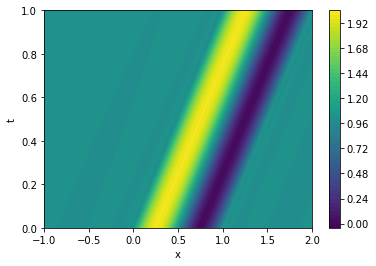

In [51]:
Nd = 400
x = np.linspace(-1, 2, 400)                                  
t = np.linspace(0, 1.0, 400)                                        
t_grid, x_grid = np.meshgrid(t, x)                              
T = t_grid.flatten()[:, None]                                   
X = x_grid.flatten()[:, None]                                   
x_test = np.hstack((T, X))                                      
x_test = torch.tensor(x_test, requires_grad=True, dtype=dtype).to(cuda)
u = to_numpy(model(x_test))
#res = to_numpy(model.res_pde(x_test))
#d   = to_numpy(model.lambda_pde(x_test))
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,0]
#loss = model.loss_pde(x_test)                                 

import matplotlib.pyplot as plt
plt.figure()
plt.figure()
ax = plt.gca()
cset = ax.contourf(x_grid[:,:],t_grid[:,:],ue,60)
#plt.plot(x[:],u_pred[:,0])

plt.xlabel('x')
plt.ylabel('t')
plt.colorbar(cset, ax=ax)
plt.savefig('CombinationWave.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


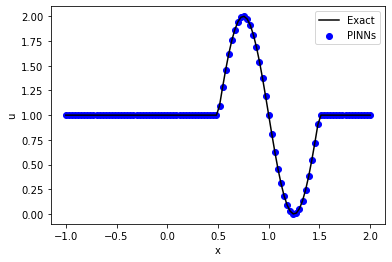

0.04874360531459887

In [64]:
Nd = 400
x = np.linspace(-1.0, 2.0, 100)                                  
t = np.linspace(0.5, 0.5, 1)                         
t_grid, x_grid = np.meshgrid(t, x)                              
T = t_grid.flatten()[:, None]                                   
X = x_grid.flatten()[:, None]                                   
x_test = np.hstack((T, X))                                      
x_e =  x_test - 0.5                                 
x_test = torch.tensor(x_test, requires_grad=True, dtype=dtype).to(cuda)
u = to_numpy(model(x_test))
#res = to_numpy(model.res_pde(x_test))
#d   = to_numpy(model.lambda_pde(x_test))
u_e = IC_Sin_Case2(x_e) 
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x[:],u_e[:],color='black' ,label='Exact')
plt.scatter(x[:],u[:,0],label='PINNs',color='blue')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.plot(x[:],Exact_u[:,200])
plt.savefig('CombinationWaveLine.eps', format='eps')
plt.show()

l2_relative_error(u[:,0],u_e)
#np.max(u[:,0]-u_e)

In [21]:

np.max(u[:,0]-u_e)

0.003618223617651406

In [ ]:

np.max(u[:,0]-u_e)

0.003618223617651406

In [11]:
Nd = 100
x = np.linspace(-0.5, 1.5, 100)                                  
t = np.linspace(0.5, 0.5, 1)                         
t_grid, x_grid = np.meshgrid(t, x)                              
T = t_grid.flatten()[:, None]                                   
X = x_grid.flatten()[:, None]                                   
x_test = np.hstack((T, X))                                      
x_test = torch.tensor(x_test, requires_grad=True, dtype=dtype).to(cuda)
u = to_numpy(model(x_test))
x_e = np.linspace(-0.5, 1.5, Nd)                                  
u_e = np.zeros(Nd)
for i in range(Nd):
    u_e[i] = Combination_wave(x_e[i]-0.5)




In [14]:

l2_relative_error(u[:,0],u_e)

0.008012627163801866